In [67]:
import tensorflow as tf

import os

In [68]:

gpus = tf.config.experimental.list_physical_devices('GPU')

In [69]:

tf . print(tf. __version__)
len(gpus)

2.11.0


0

In [70]:
#Avoid OOM errors by setting GPU MEMORY consumption Growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [71]:
#1.2Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [72]:
data_dir = 'data'
image_exits = ['jpeg','jpg','bmp','png']

In [8]:
#os.listdir(os.path.join(data_dir,'Burger'))

In [9]:
# from pathlib import Path
# import imghdr

# data_dir = "C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data/chicken"
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.remove(filepath)

In [73]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image) #data directory+image folder+iamge itself
        try:
            img = cv2.imread(image_path) #read the image as a numpy array
            tip = imghdr.what(image)
            if tip not in image_exits:
                #print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
           
            print('Issue with image {}',format(image_path))

Issue with image {} data\chicken\-galliformes-coop-domestic-farmyard-organic-chickens-phasianidae-hens-792927.jpg
Issue with image {} data\chicken\-standing-isolated-white-background-use-for-farm-animals-and-livestock-theme.jpg
Issue with image {} data\chicken\-standing-isolated-white-background-use-for-farm-animals-and-livestock-theme2.jpg
Issue with image {} data\chicken\000411001ff7dd4f.jpg
Issue with image {} data\chicken\001_468_IMG_IMG_9059-848x565.jpg
Issue with image {} data\chicken\001_692_IMG_shutterstock_204241852-848x565.jpg
Issue with image {} data\chicken\0037f7da182841f7.jpg
Issue with image {} data\chicken\0084f276393d2cc3.jpg
Issue with image {} data\chicken\00ad10bacf035759.jpg
Issue with image {} data\chicken\00dfa7d3eb55cdf2.jpg
Issue with image {} data\chicken\00eeeb9233846b7c.jpg
Issue with image {} data\chicken\00fc8c1bd15fce8e.jpg
Issue with image {} data\chicken\01-future-of-chicken-futureoffood_16x9.jpg
Issue with image {} data\chicken\01-future-of-chicken-fut

In [74]:
import numpy as np

In [91]:

data = tf.keras.utils.image_dataset_from_directory('data',image_size=(224,224),shuffle=True) #building data pipelines  reestablsh the data pipeline


Found 6416 files belonging to 6 classes.


In [76]:
data_iterator = data.as_numpy_iterator() #make data iterable

In [77]:
batch = data_iterator.next()

In [92]:
batch #size of 32
print(len(batch)) #images & labels
print(batch[0].shape) #iamges in a batch   32images by 256x256pixels in three color channels
print(batch[1].shape) #labels in a batch


2
(32, 224, 224, 3)
(32,)


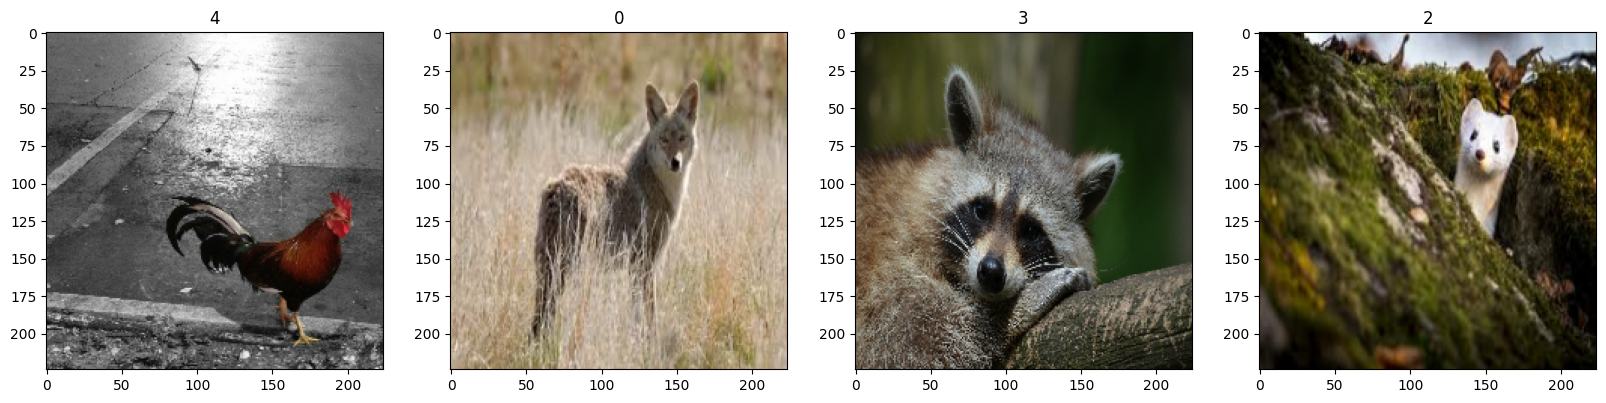

In [79]:
fig,ax = plt.subplots(ncols=4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#image pre-processing

In [93]:
#image pre-processing
data = data.map(lambda x,y:(x/255,y))  #x-images  #y-labels  get x and diveided by 255

In [111]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

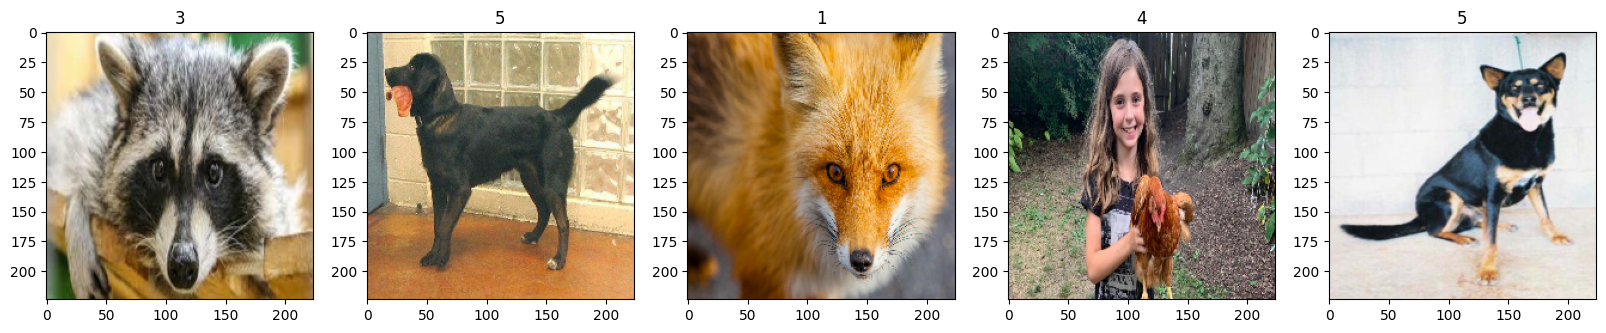

In [112]:
fig,ax = plt.subplots(ncols=5,figsize = (20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [113]:
len(data)

201

In [114]:
#2.2 Split Data

train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

141 40 20
201


In [115]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

3. Deep Model

In [116]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [117]:


# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [118]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [119]:
import tensorflow.keras as keras
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(6)

In [120]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
])
model.add(Dense(6, activation='softmax'))

In [121]:
#optimizer
#import tensorflow.keras as keras

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [122]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [123]:
#Train

logdir = 'logs'

In [124]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [125]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12
141/141 [==============================] - 66s 454ms/step - loss: 0.4717 - accuracy: 0.8628 - val_loss: 0.2744 - val_accuracy: 0.9133
Epoch 2/12
141/141 [==============================] - 64s 450ms/step - loss: 0.2067 - accuracy: 0.9375 - val_loss: 0.2134 - val_accuracy: 0.9383
Epoch 3/12
141/141 [==============================] - 63s 448ms/step - loss: 0.1507 - accuracy: 0.9559 - val_loss: 0.2170 - val_accuracy: 0.9398
Epoch 4/12
141/141 [==============================] - 63s 447ms/step - loss: 0.1231 - accuracy: 0.9648 - val_loss: 0.2052 - val_accuracy: 0.9383
Epoch 5/12
141/141 [==============================] - 64s 453ms/step - loss: 0.1049 - accuracy: 0.9725 - val_loss: 0.1943 - val_accuracy: 0.9430
Epoch 6/12
141/141 [==============================] - 64s 451ms/step - loss: 0.0860 - accuracy: 0.9778 - val_loss: 0.2098 - val_accuracy: 0.9422
Epoch 7/12
141/141 [==============================] - 63s 448ms/step - loss: 0.0732 - accuracy: 0.9856 - val_loss: 0.1848 - val_ac

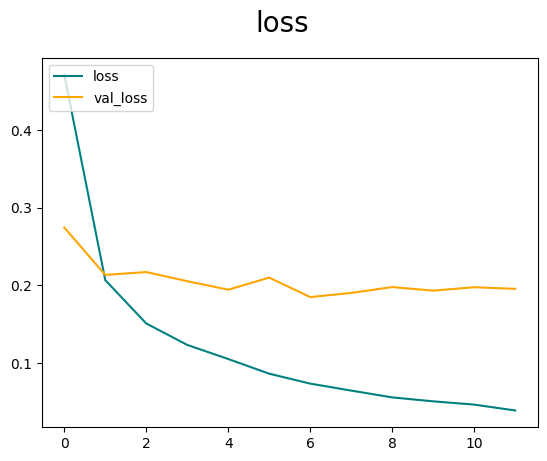

In [126]:
#3.3 Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

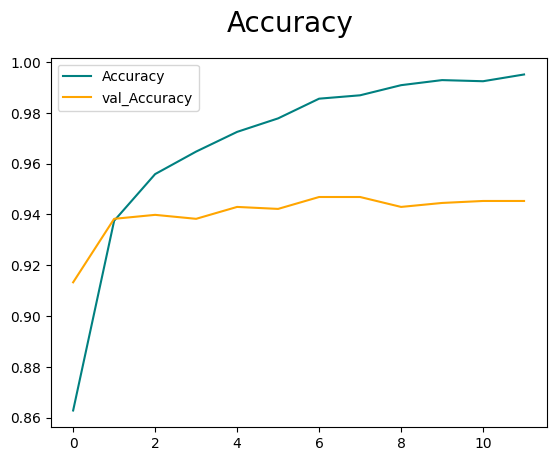

In [127]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [140]:
#Part4
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy
#4.1 evaluate
pre = Precision()
re = Recall()
acc=CategoricalAccuracy()



In [129]:
len(test)

20

In [141]:
import copy
correct = 0
total = 0
for batch in test.as_numpy_iterator():
    X,y = batch
    y = list(y)
    buffer = y
    
    y_total = []
    for i in range(len(y)):
        y_abc = []
        for q in range(y[i]):
            y_abc.append(0)
        y_abc.append(1)
        for q in range(5-y[i]):
            y_abc.append(0)
        y_total.append(y_abc)
    y_total = np.array(y_total)
    yhat = model.predict(X) 
    for i in range(len(y_total)):
        if (yhat[i][4]>=0.5 and y_total[i][4]==1) or (yhat[i][4]<0.5 and y_total[i][4]!=1):
            correct +=1
        total+=1
    pre.update_state(y_total,yhat)
    re.update_state(y_total,yhat)
    acc.update_state(y_total,yhat)

print(correct)
print(total)

print(f'The accuracy of the algorithm on predicting if the animal is chicken or not: {correct/total}')



1/1 [==============================] - 0s 171ms/step
605
624
The accuracy of the algorithm on predicting if the animal is chicken or not: 0.969551282051282


In [142]:
# print(pre.result(), re.result(), acc.result())
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.92357725, shape=(), dtype=float32) tf.Tensor(0.9102564, shape=(), dtype=float32) tf.Tensor(0.9182692, shape=(), dtype=float32)


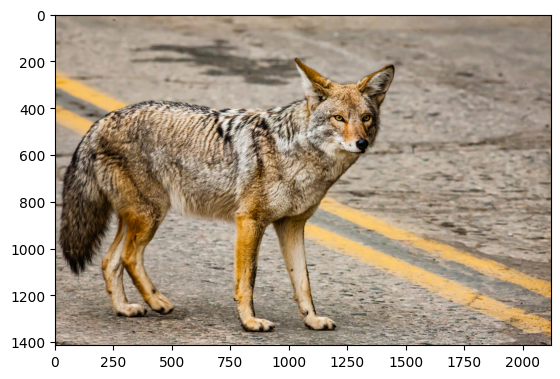

In [137]:
#4.2 Test
img = cv2.imread('C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data/Coyotes/coyote3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

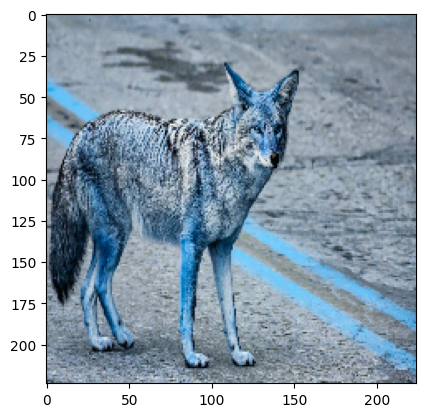

In [138]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
classes = ['Coyotes','Fox','Minks','Raccoon','Chicken','Dog']
print(classes[np.argmax(yhat)])

1/1 [==============================] - 0s 37ms/step
[[9.9697518e-01 2.1411208e-03 3.2662067e-06 1.2985905e-04 2.2745699e-04
  5.2317878e-04]]
Coyotes


In [153]:
print(yhat)

[[6.0518485e-01 3.8098522e-05 3.8522474e-05 3.9473814e-01 3.2924072e-07
  1.7926831e-09]]


In [136]:
#5.Save the Model

from tensorflow.keras.models import load_model
model.save(os.path.join('models','animal_gold.h5'))



In [121]:
new_model = load_model(os.path.join('models','animal_2.h5'))
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


array([[1.2643878e-06, 4.8750888e-08, 3.6975609e-07, 1.4733443e-01,
        8.5243624e-01, 2.2760784e-04]], dtype=float32)

#Test original Dataset

In [90]:
from tensorflow.keras.preprocessing import image

def prepare_image(file):
    img_path='C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data' #/chicken/images121.jpg
    img = tf.keras.utils.load_img(img_path+file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [86]:

def show_image(file):
    img_path='C:/Users/bests/OneDrive/Desktop/fall2023/DS FORMERS/Project/final project - Copy/data'
    
    img = cv2.imread(img_path+file)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

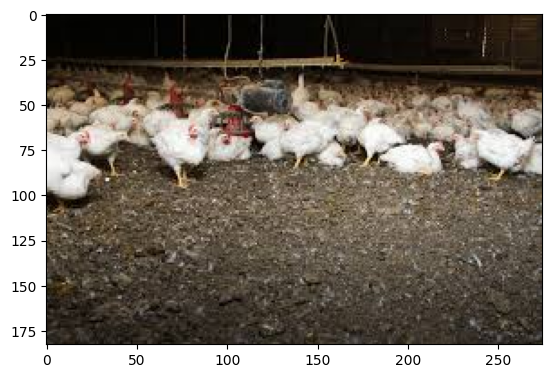

In [80]:
show_image('/chicken/images121.jpg')

In [91]:
from tensorflow.keras.applications import imagenet_utils

base_model2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
preprocessed_image = prepare_image('/chicken/images121.jpg')
predictions = base_model2.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results                                            

1/1 [==============================] - 1s 514ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 7, 7, 1280)